<a href="https://colab.research.google.com/github/Aleena-Mishra-10/Python/blob/master/PREDICTING_COVID_19_CASES_USING_PYHTON.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving kaggle.json to kaggle.json
User uploaded file "kaggle.json" with length 68 bytes


In [ ]:
!mkdir ~p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download -d sudalairajkumar/covid19-in-india

  0% 0.00/268k [00:00<?, ?B/s]
100% 268k/268k [00:00<00:00, 39.6MB/s]


In [ ]:
from zipfile import ZipFile
file_name="covid19-in-india.zip"

with ZipFile(file_name,'r') as zip_ref:
  zip_ref.extractall()
  print('Done')

Done


In [ ]:
import pandas as pd
import datetime as dt
from matplotlib import pyplot as plt
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
COVID_DF = pd.read_csv('covid_19_india.csv')
print(COVID_DF.head())

   Sno      Date     Time  ... Cured Deaths Confirmed
0    1  30/01/20  6:00 PM  ...     0      0         1
1    2  31/01/20  6:00 PM  ...     0      0         1
2    3  01/02/20  6:00 PM  ...     0      0         2
3    4  02/02/20  6:00 PM  ...     0      0         3
4    5  03/02/20  6:00 PM  ...     0      0         3

[5 rows x 9 columns]


In [ ]:
print(COVID_DF.isnull().sum()) #No missing data

Sno                         0
Date                        0
Time                        0
State/UnionTerritory        0
ConfirmedIndianNational     0
ConfirmedForeignNational    0
Cured                       0
Deaths                      0
Confirmed                   0
dtype: int64


In [ ]:
COVID_DF=COVID_DF.dropna()

In [ ]:
COVID_DF.drop(['Sno', 'Time', 'Cured', 'ConfirmedIndianNational', 'ConfirmedForeignNational'], axis=1, inplace=True)

In [ ]:
COVID_DF.head()

,Date,State/UnionTerritory,Deaths,Confirmed
0,30/01/20,Kerala,0,1
1,31/01/20,Kerala,0,1
2,01/02/20,Kerala,0,2
3,02/02/20,Kerala,0,3
4,03/02/20,Kerala,0,3


In [ ]:
COVID_DF.dtypes

Date                    object
State/UnionTerritory    object
Deaths                   int64
Confirmed                int64
dtype: object

In [ ]:
COVID_DF['Date'] = [dt.datetime.strptime(x,'%d/%m/%y') for x in COVID_DF['Date']] 

In [ ]:
print(COVID_DF)

           Date State/UnionTerritory  Deaths  Confirmed
0    2020-01-30               Kerala       0          1
1    2020-01-31               Kerala       0          1
2    2020-02-01               Kerala       0          2
3    2020-02-02               Kerala       0          3
4    2020-02-03               Kerala       0          3
...         ...                  ...     ...        ...
5156 2020-08-12            Telengana     665      86475
5157 2020-08-12              Tripura      44       6603
5158 2020-08-12          Uttarakhand     140      10886
5159 2020-08-12        Uttar Pradesh    2230     136238
5160 2020-08-12          West Bengal    2203     104326

[5161 rows x 4 columns]


In [ ]:
COVID_DF.dtypes

Date                    datetime64[ns]
State/UnionTerritory            object
Deaths                           int64
Confirmed                        int64
dtype: object

In [ ]:
COVID_DF.columns = ['Date', 'State', 'Total Deaths', 'Total Cases']

In [ ]:
COVID_DF = pd.DataFrame(COVID_DF.groupby(['State', 'Date'])['Total Cases', 'Total Deaths'].sum()).reset_index()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


In [ ]:
COVID_DF = COVID_DF.sort_values(by = ['State','Date'], ascending=False)
print(COVID_DF)

                            State       Date  Total Cases  Total Deaths
5125                  West Bengal 2020-08-12       205716          4352
5124                  West Bengal 2020-08-11        98459          2100
5123                  West Bengal 2020-08-10        95554          2059
5122                  West Bengal 2020-08-09        92615          2005
5121                  West Bengal 2020-08-08        89666          1954
...                           ...        ...          ...           ...
4     Andaman and Nicobar Islands 2020-03-30            9             0
3     Andaman and Nicobar Islands 2020-03-29            9             0
2     Andaman and Nicobar Islands 2020-03-28            6             0
1     Andaman and Nicobar Islands 2020-03-27            1             0
0     Andaman and Nicobar Islands 2020-03-26            1             0

[5126 rows x 4 columns]


In [ ]:
def plot_bar(feature, value, title, df, size):
    f, ax = plt.subplots(1,1, figsize=(4*size,4))
    df = df.sort_values([value], ascending=False).reset_index(drop=True)
    g = sns.barplot(df[feature][0:10], df[value][0:10], palette='Set3')
    g.set_title("Number of {} - highest 10 values".format(title))
    plt.show() 

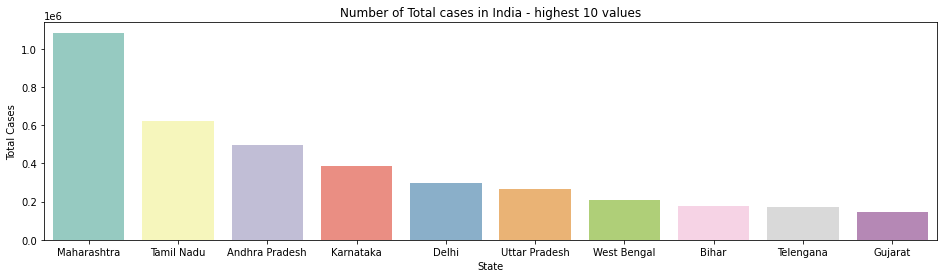

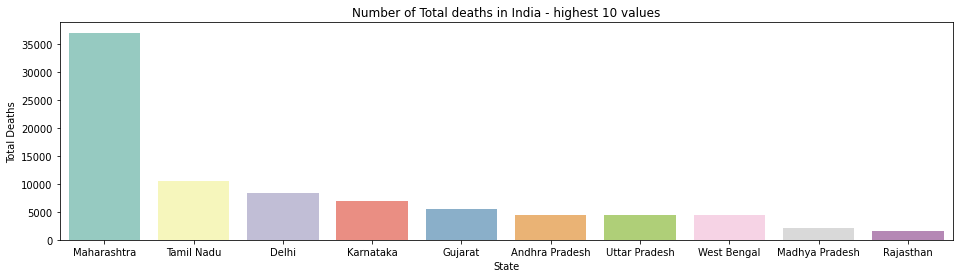

In [ ]:
filtered_CVD = COVID_DF.drop_duplicates(subset = ['State'], keep='first')
plot_bar('State', 'Total Cases', 'Total cases in India', filtered_CVD, size=4)
plot_bar('State', 'Total Deaths', 'Total deaths in India', filtered_CVD, size=4)

In [ ]:
def plot_world_aggregate(df, title='Aggregate plot', size=1):
    f, ax = plt.subplots(1,1, figsize=(4*size,2*size))
    g = sns.lineplot(x="Date", y='Total Cases', data=df, color='blue', label='Total Cases')
    g = sns.lineplot(x="Date", y='Total Deaths', data=df, color='red', label='Total Deaths')
    plt.xlabel('Date')
    plt.ylabel(f'Total {title} cases')
    plt.xticks(rotation=90)
    plt.title(f'Total {title} cases')
    ax.grid(color='black', linestyle='dotted', linewidth=0.75)
    plt.show() 

In [ ]:
CVD_aggregate = COVID_DF.groupby(['Date']).sum().reset_index()
print(CVD_aggregate)

          Date  Total Cases  Total Deaths
0   2020-01-30            1             0
1   2020-01-31            1             0
2   2020-02-01            2             0
3   2020-02-02            3             0
4   2020-02-03            3             0
..         ...          ...           ...
191 2020-08-08      2088611         42518
192 2020-08-09      2153010         43379
193 2020-08-10      2215074         44386
194 2020-08-11      2268675         45257
195 2020-08-12      4726275         93124

[196 rows x 3 columns]


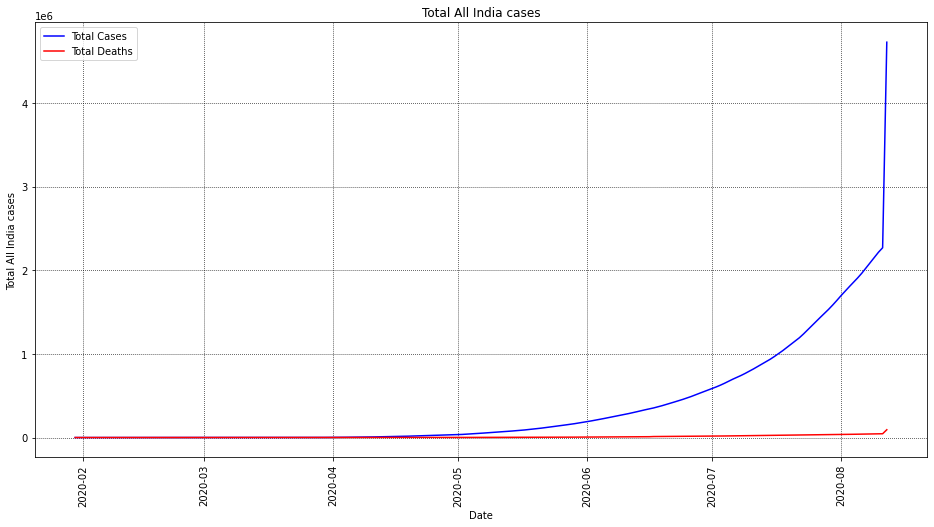

In [ ]:
plot_world_aggregate(CVD_aggregate, 'All India', size=4)

In [ ]:
def plot_aggregate_states(df, states, case_type='Total Cases', size=3, is_log=False):
    f, ax = plt.subplots(1,1, figsize=(4*size, 3*size))
    for state in states:
        df_ = df[(df['State']==state) & (df['Date'] > '2020-03-01')] 
        g = sns.lineplot(x="Date", y=case_type, data=df_,  label=state)  
        ax.text(max(df_['Date']), max(df_[case_type]), str(state))
    plt.xlabel('Date')
    plt.ylabel(f' {case_type} ')
    plt.title(f' {case_type} ')
    plt.xticks(rotation=90)
    if(is_log):
        ax.set(yscale="log")
    ax.grid(color='black', linestyle='dotted', linewidth=0.75)
    plt.show()

In [ ]:
CVD_state_aggregate = COVID_DF.groupby(['State', 'Date']).sum().reset_index()

states = ["Maharashtra", "Kerala", "Karnataka", "Telengana", 
                         "Uttar Pradesh", "Andhra Pradesh"]

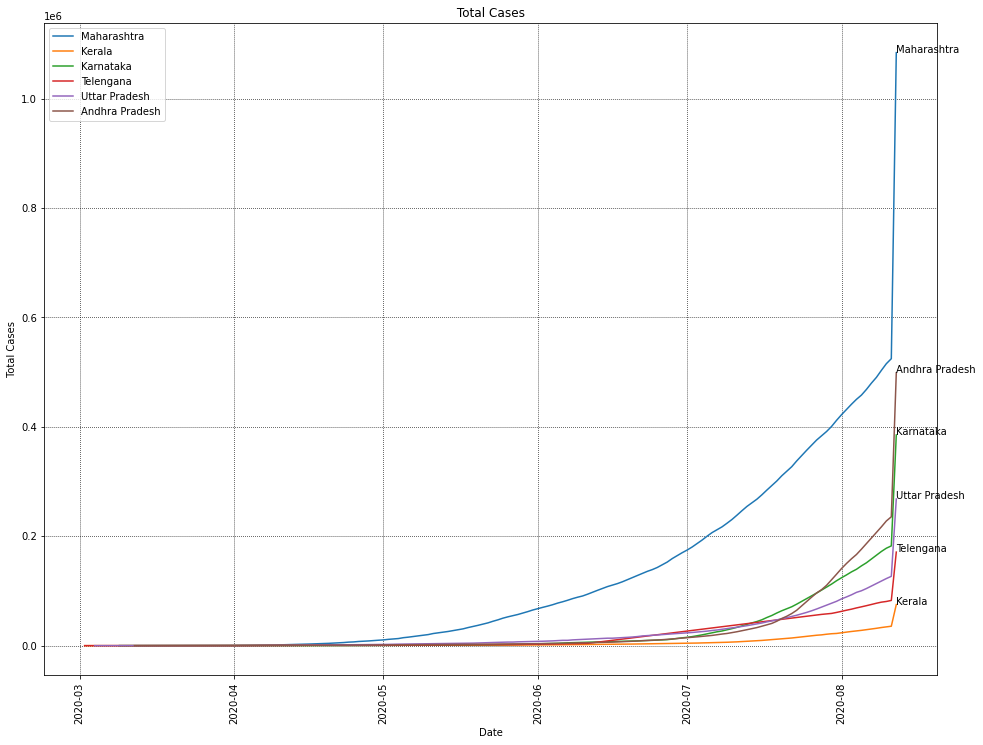

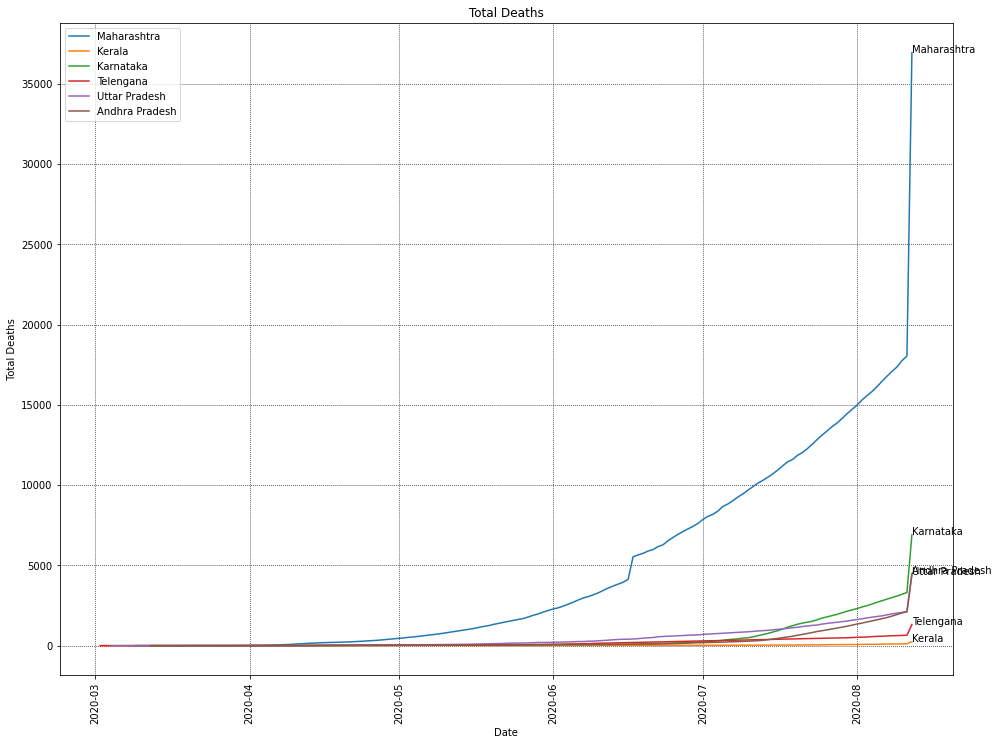

In [ ]:
plot_aggregate_states(CVD_state_aggregate, states, case_type = 'Total Cases', size=4)    
plot_aggregate_states(CVD_state_aggregate, states, case_type = 'Total Deaths', size=4)

In [ ]:
def plot_mortality(df, title='Mortality', size=1):
    f, ax = plt.subplots(1,1, figsize=(4*size,2*size))
    g = sns.lineplot(x="Date", y='Mortality (Deaths/Cases)', data=df, color='blue', label='Mortality (Deaths / Total Cases)')
    plt.xlabel('Date')
    plt.ylabel(f'Mortality {title} [%]')
    plt.xticks(rotation=90)
    plt.title(f'Mortality percent {title}\nCalculated as Deaths/Confirmed cases')
    ax.grid(color='black', linestyle='dashed', linewidth=1)
    plt.show()

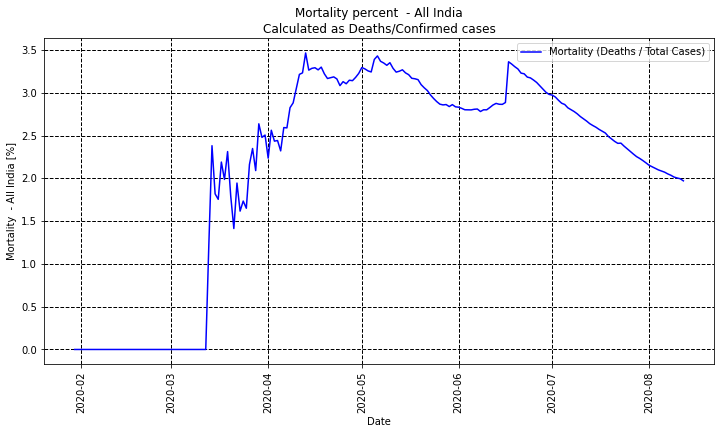

In [ ]:
CVD_aggregate['Mortality (Deaths/Cases)'] = CVD_aggregate['Total Deaths'] / CVD_aggregate['Total Cases'] * 100
plot_mortality(CVD_aggregate, title = ' - All India', size = 3)

**PREDICTION using exponential fit**

In [ ]:
 import numpy as np
import scipy
import seaborn as sns

In [ ]:
def plot_exponential_fit_data(d_df, title, delta):
    d_df = d_df.sort_values(by=['Date'], ascending=True)
    d_df['x'] = np.arange(len(d_df)) + 1  #Add column x to the dataframe 
    d_df['y'] = d_df['Total Cases']   #Add column y to the dataframe 
    x = d_df['x'][:-delta]  #Remove delta number of data points (so we can predict them)
    y = d_df['y'][:-delta]  #Remove delta number of data points (so we can predict them)
    #Use non-linear least squares to fit a function, f, to data.
    #Let us fit data to exponential function: #y = Ae^(Bt)
    c2 = scipy.optimize.curve_fit(lambda t, a, b: a*np.exp(b*t),  x,  y,  p0=(20, 0.2))
    # Function: lambda t, a, b: a*np.exp(b*t)
    # xm y and po for initial values. 
    A, B = c2[0]  #Coefficients
    print(f'(y = Ae^(Bx)) A: {A}, B: {B}\n')
    x = range(1,d_df.shape[0] + 1)
    y_fit = A * np.exp(B * x)
    f, ax = plt.subplots(1,1, figsize=(12,6))
    g = sns.scatterplot(x=d_df['x'][:-delta], y=d_df['y'][:-delta], label='Confirmed cases (used for model creation)', color='red')
    g = sns.scatterplot(x=d_df['x'][-delta:], y=d_df['y'][-delta:], label='Confirmed cases (not used for model, va;idation)', color='blue')
    g = sns.lineplot(x=x, y=y_fit, label='Predicted values', color='green')  #Predicted
    x_future=range(89,95) #As of 24 March 2020 we have 85 days of info. 
    y_future=A * np.exp(B * x_future)
    print("Expected cases for the next 5 days: \n", y_future)
    plt.xlabel('Days since first case')
    plt.ylabel(f'Total cases')
    plt.title(f'Confirmed cases & projected cases: {title}')
    plt.xticks(rotation=90)
    ax.grid(color='black', linestyle='dotted', linewidth=0.75)
    plt.show()

In [ ]:
CVD_India = CVD_aggregate
CVD_Maharashtra = CVD_state_aggregate[CVD_state_aggregate['State']=='Maharashtra']
CVD_Telangana = CVD_state_aggregate[CVD_state_aggregate['State']=='Telengana']
CVD_Andhra = CVD_state_aggregate[CVD_state_aggregate['State']=='Andhra Pradesh']

(y = Ae^(Bx)) A: 3.376522506118718, B: 0.07398189866828157

Expected cases for the next 5 days: 
 [2443.61875771 2631.25767864 2833.30488831 3050.86676053 3285.13462455
 3537.39128862]


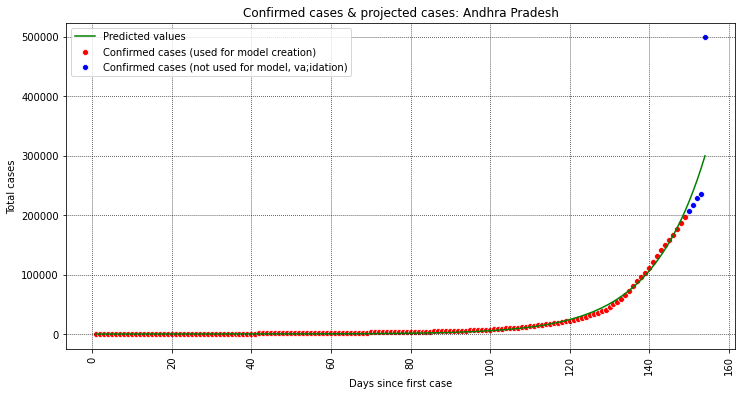

In [ ]:
d_df = CVD_Andhra.copy()
plot_exponential_fit_data(d_df, 'Andhra Pradesh', 5)

(y = Ae^(Bx)) A: 0.06445899454385294, B: 0.12667306258437935

Expected cases for the next 5 days: 
 [5075.48095639 5760.90368843 6538.88992837 7421.93999549 8424.24232554
 9561.90144391]


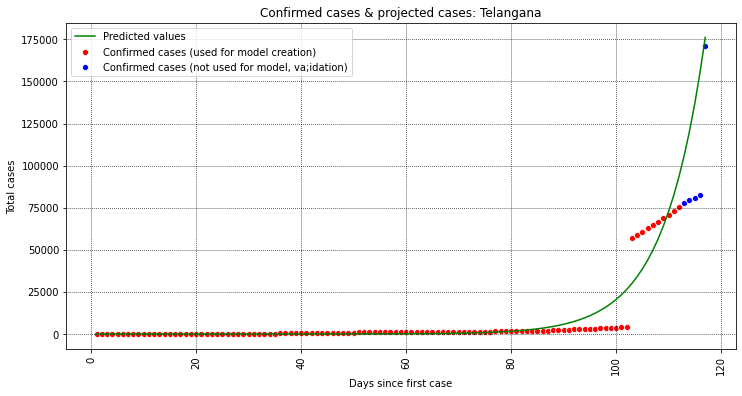

In [ ]:
d_df1 = CVD_Telangana.copy()
plot_exponential_fit_data(d_df1, 'Telangana', 5)

(y = Ae^(Bx)) A: 5204.84216308688, B: 0.030201057542688706

Expected cases for the next 5 days: 
 [76514.7474067  78860.82234887 81278.83202023 83770.98206442
 86339.54575395 88986.86606378]


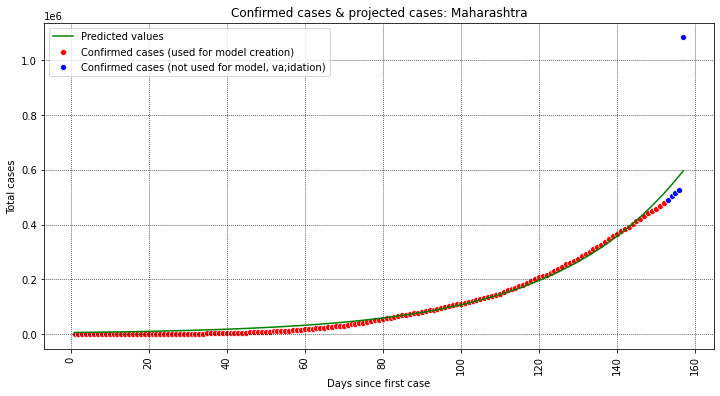

In [ ]:
d_df1 = CVD_Maharashtra.copy()
plot_exponential_fit_data(d_df1, 'Maharashtra', 5)